'\nSo including the Gaussian destroys the oscillations. What about dissipation? Does adding a coupling \nterm fix this? So it gives me a Lorentzian?\n'

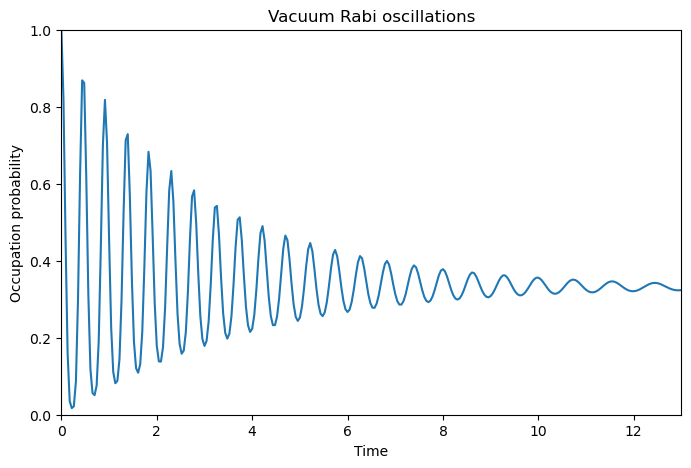

In [1]:
#So first I should call the libraries that I'm using numpy,qutip,scipy,and matplot
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from qutip import *

'''def qutrit_basis():
    """Basis states for a three level system (qutrit)

    Returns
    -------
    qstates : array
        Array of qutrit basis vectors

    """
    out = np.empty((3,), dtype=object)
    out[:] = [basis(3, 0), basis(3, 1), basis(3, 2)]
    return out'''

def three_level_ops():
    ''' Operators for a three level system (qutrit)

    Returns
    --------
    sig11 : Ground to ground
    sig22 : 1st excited to 1st excited
    sig33 : 2nd excited to 2nd excited
    sig21 : 1st excited to ground
    sig32 : 2nd excited to 1st excited

    '''
    one, two, three = qutrit_basis()
    # Note that the three level operators are different
    # from the qutrit operators. A three level atom only
    # has transitions 1 <-> 2 <-> 3, so we define the
    # operators seperately from the qutrit code
    sig11 = one * one.dag()
    sig22 = two * two.dag()
    sig33 = three * three.dag()
    sig21 = two * one.dag()
    sig32 = three * two.dag()
    return sig11, sig22, sig33, sig21, sig32

'''
Now that we've defined the basis for our 3-level system. We can now perform operations on it. To do
this we refer to the qutip two-photon interference to set up the problem for the Lindbladian master 
equation solver to calculate expectation values. This follows the following documentation:
(https://notebook.community/ajgpitch/qutip-notebooks/examples/pulse-wise-two-photon-interference).

'''


#time parameters
tlist = np.linspace(0, 13, 300) #linspace(start,stop,num)
#Returns num evenly spaced samples, calculated over the interval [start, stop]
taulist = tlist #if we calculate g(2) we need a list time for the photon separations

#Gaussian wavepacket parameters - Including this now
tp = 10      # Gaussian pulse parameter - used the parameter given on the site 
Om = 19.40                   # driving strength - used parameter given on the site
t_offset = 0.405 #temporal offset for the first photon - used parameter given on the site
pulse_shape = Om/2 * np.exp(-(tlist - t_offset) ** 2 /
                                (2 * tp ** 2))

# initial state
psi0 = fock(3, 0)              # ground state

# operators
sig11, sig22, sig33, sig21, sig32 = three_level_ops()
n = [sig21.dag()*sig21,sig32.dag()*sig32]          # number operator

# collapse operators describes dissipation
gamma = 0.5
c_ops = [np.sqrt(gamma) * sig21,np.sqrt(gamma) * sig32]  # represents spontaneous emission

# Hamiltonian - The other major code change. 
H_I=[(sig21.dag()+sig32.dag()+sig21+sig32),pulse_shape]

"'Now easy peasy, calculate the emission'"

output=mesolve(H_I, psi0, tlist,c_ops,n)

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(tlist, output.expect[0])
ax.set_xlim(0, 13)
ax.set_ylim(0, 1)
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')
ax.set_title('Vacuum Rabi oscillations')

'''
So including the Gaussian destroys the oscillations. What about dissipation? Does adding a coupling 
term fix this? So it gives me a Lorentzian?
'''

In [ ]:
#Ok so taking out the operators that leave it in the same state does something. Now slowly add 
#them back in? Actually more important to look at dissipation... so let's do that first. 